In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [5]:
head = df.head(10)

In [6]:
head

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [7]:
head.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             10 non-null     object 
 1   AverageTemperature             5 non-null      float64
 2   AverageTemperatureUncertainty  5 non-null      float64
 3   Country                        10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [9]:
head.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,5.000000,5.000000
mean,7.913400,2.350000
std,5.556832,1.344236
min,1.530000,1.410000
25%,4.384000,1.577000
50%,6.702000,1.789000
75%,11.609000,2.294000
max,15.342000,4.680000


In [11]:
df.shape

(577462, 4)

In [12]:
df.isnull()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,False,False,False,False
1,False,True,True,False
2,False,True,True,False
3,False,True,True,False
4,False,True,True,False
...,...,...,...,...
577457,False,False,False,False
577458,False,False,False,False
577459,False,False,False,False
577460,False,False,False,False


In [13]:
df.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [14]:
df.isnull().sum().sum()

64563

### Filling Null values

Below cell is just for reference , not to run

In [ ]:
# Filling with a constant value
df2 = df.fillna(value = 0)
# Filling with previous value
df3 = df.fillna(method = 'pad')
# Filling with next value
df4 = df.fillna(method = 'bfill')
# Filling with previous value but along row , that is ,, prev column value
df5 = df.fillna(method = 'pad' , axis = 1)
# Filling different columns with different values
df6 = df.fillna({'columns1' : 'abcd',
               'columns2' : 'efgh'})
# filling null values with mean
df7 = df.fillna(value = df['AverageTemperature'].mean())
# Dropping na values
df8 = df.dropna()
df9 = df.dropna(how = 'all') # gets dropped only if all the values are NAN
## By keeping how = 'any' , all rows containing even a single NAN gets dropped

Replace # Using replace , this is not restricted to only NULL values

df10 = df.replace(to_replace = np.nan , value = 888)
df11 = df.replace(to_replace = 5 , value = 10)
 
Interpolate # USing interpolate

df['AverageTemperature'] = df['AverageTemperature'].interpolate(method = 'linear')
# There is also a method to limit the number of consecutive nan values we want to fill


In [15]:
df['AverageTemperature'] = df['AverageTemperature'].interpolate(method = 'linear')
df['AverageTemperatureUncertainty'] = df['AverageTemperatureUncertainty'].interpolate(method = 'linear')
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.3840,2.2940,Åland
1,1743-12-01,3.8132,2.7712,Åland
2,1744-01-01,3.2424,3.2484,Åland
3,1744-02-01,2.6716,3.7256,Åland
4,1744-03-01,2.1008,4.2028,Åland
...,...,...,...,...
577457,2013-05-01,19.0590,1.0220,Zimbabwe
577458,2013-06-01,17.6130,0.4730,Zimbabwe
577459,2013-07-01,17.0000,0.4530,Zimbabwe
577460,2013-08-01,19.7590,0.7170,Zimbabwe


In [16]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [20]:
date_cols = pd.DatetimeIndex(df['dt'])

In [21]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [22]:
df['Year'] = date_cols.year
df['Month'] = date_cols.month
df['Day'] = date_cols.day
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Month,Day
0,1743-11-01,4.3840,2.2940,Åland,1743,11,1
1,1743-12-01,3.8132,2.7712,Åland,1743,12,1
2,1744-01-01,3.2424,3.2484,Åland,1744,1,1
3,1744-02-01,2.6716,3.7256,Åland,1744,2,1
4,1744-03-01,2.1008,4.2028,Åland,1744,3,1
...,...,...,...,...,...,...,...
577457,2013-05-01,19.0590,1.0220,Zimbabwe,2013,5,1
577458,2013-06-01,17.6130,0.4730,Zimbabwe,2013,6,1
577459,2013-07-01,17.0000,0.4530,Zimbabwe,2013,7,1
577460,2013-08-01,19.7590,0.7170,Zimbabwe,2013,8,1


In [23]:
threshold = 2.0  
filtered_df = df[df['AverageTemperatureUncertainty'] <= threshold]

In [24]:
df.shape

(577462, 7)

In [26]:
filtered_df.shape

(495036, 7)

In [27]:
print(f"\nOriginal Dataset Size: {df.shape}")
print(f"Filtered Dataset Size: {filtered_df.shape}")


Original Dataset Size: (577462, 7)
Filtered Dataset Size: (495036, 7)


In [28]:
yearly_trends = filtered_df.groupby('Year').agg({
    'AverageTemperature': 'mean',
    'AverageTemperatureUncertainty': 'mean'
}).reset_index()


Filtered

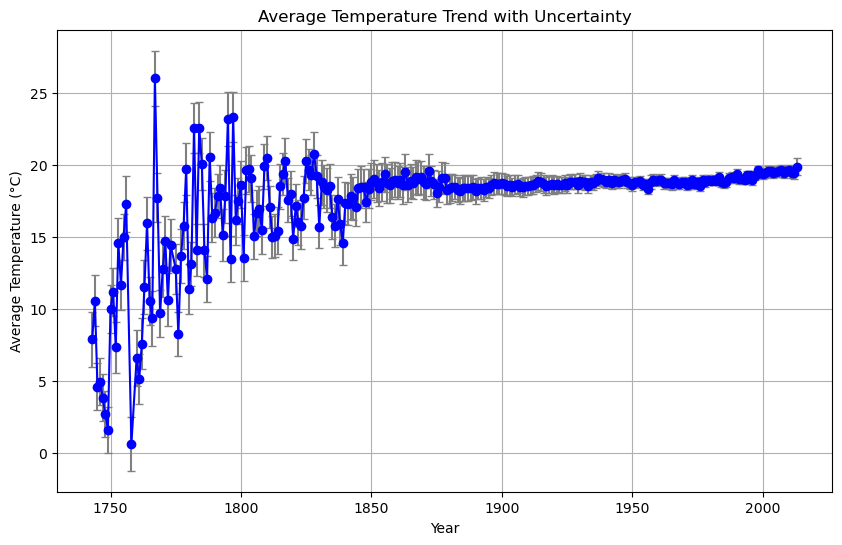

In [29]:
plt.figure(figsize=(10, 6))
plt.errorbar(yearly_trends['Year'], yearly_trends['AverageTemperature'], 
             yerr=yearly_trends['AverageTemperatureUncertainty'], fmt='o-', color='blue', ecolor='gray', capsize=3)
plt.title("Average Temperature Trend with Uncertainty")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid()
plt.show()

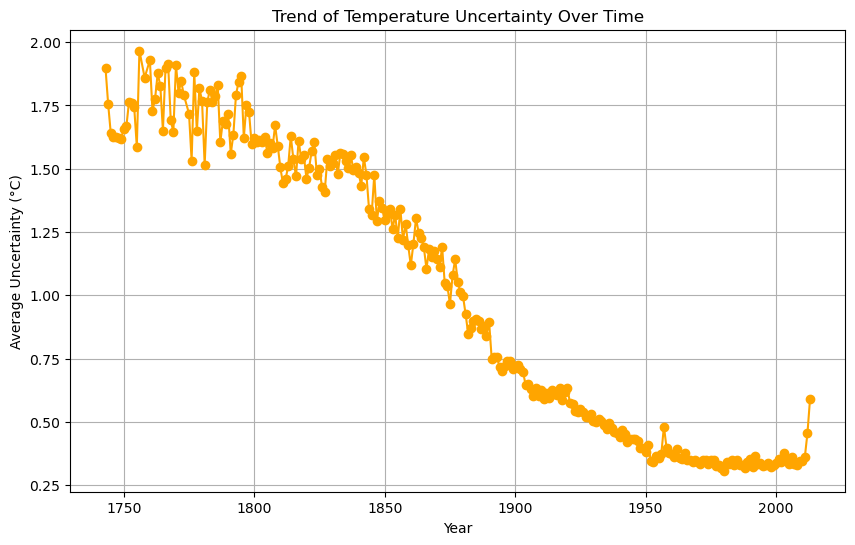

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_trends['Year'], yearly_trends['AverageTemperatureUncertainty'], marker='o', color='orange')
plt.title("Trend of Temperature Uncertainty Over Time")
plt.xlabel("Year")
plt.ylabel("Average Uncertainty (°C)")
plt.grid()
plt.show()


In [31]:
high_uncertainty_years = yearly_trends[yearly_trends['AverageTemperatureUncertainty'] > threshold]
print("\nYears with High Uncertainty:")
print(high_uncertainty_years)


Years with High Uncertainty:
Empty DataFrame
Columns: [Year, AverageTemperature, AverageTemperatureUncertainty]
Index: []


In [32]:
original_yearly_trends = df.groupby('Year').agg({
    'AverageTemperature': 'mean',
    'AverageTemperatureUncertainty': 'mean'
}).reset_index()

# Identify high-uncertainty years from the original trends
high_uncertainty_years = original_yearly_trends[original_yearly_trends['AverageTemperatureUncertainty'] > threshold]
print("\nYears with High Uncertainty (Original Data):")
print(high_uncertainty_years)


Years with High Uncertainty (Original Data):
    Year  AverageTemperature  AverageTemperatureUncertainty
0   1743            5.531874                       2.245312
1   1744            9.643669                       2.232698
7   1750            8.629358                       2.102263
8   1751            8.457291                       2.091245
9   1752            5.608417                       2.238812
..   ...                 ...                            ...
91  1834           15.851550                       2.337017
92  1835           15.244497                       2.126993
93  1836           15.495236                       2.205622
94  1837           15.330712                       2.203225
95  1838           15.158821                       2.295493

[91 rows x 3 columns]


UNfiltered

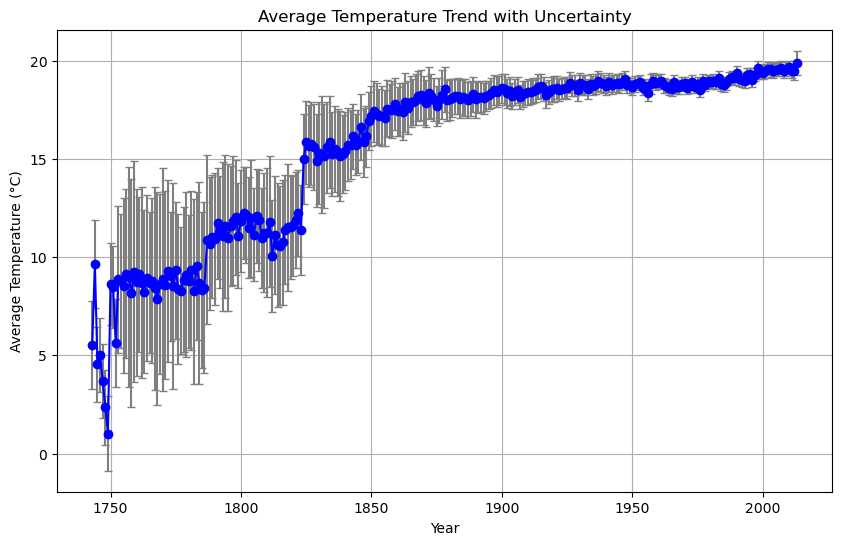

In [33]:
plt.figure(figsize=(10, 6))
plt.errorbar(original_yearly_trends['Year'], original_yearly_trends['AverageTemperature'], 
             yerr=original_yearly_trends['AverageTemperatureUncertainty'], fmt='o-', color='blue', ecolor='gray', capsize=3)
plt.title("Average Temperature Trend with Uncertainty")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid()
plt.show()

In [34]:
filtered_df.to_csv('cleaned_temperatures.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_temperatures.csv'.")


Cleaned dataset saved as 'cleaned_temperatures.csv'.
